# K 최근접 이웃( K-Nearest Neighbor)
- K : 이웃의 수
- Nearest: 거리

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2차원 공간에 4개 train data 설정
x = pd.DataFrame([[1,1],[2,3],[4,3],[10,8]], columns=['ax1','ax2'])
display(x)

# train data의 label 설정
y = pd.DataFrame(['a','a','b','b'], columns=['type'])
display(y)

# 3-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

# test data
x_test = pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
display(x_test)

pred = knn.predict(x_test)
print('분류:',pred,'\n')

,ax1,ax2
0,1,1
1,2,3
2,4,3
3,10,8


,type
0,a
1,a
2,b
3,b


,ax1,ax2
0,2,7
1,5,4


분류: ['a' 'a'] 



In [ ]:
# test data와 train data와의 거리
print(knn.kneighbors(x_test,4)) # kneighbors(X=None, n_neighbors=None, return_distance=True)
                                # 입력한 데이터와 이웃들의 거리와 인덱스를 반환

(array([[4.        , 4.47213595, 6.08276253, 8.06225775],
       [1.41421356, 3.16227766, 5.        , 6.40312424]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]]))


In [ ]:
from math import sqrt
print('test data(2,7)와 (10,8)과의 거리: ',sqrt((2-10)**2+(7-8)**2))

test data(2,7)와 (10,8)과의 거리:  8.06225774829855


In [ ]:
sample = pd.concat([x.join(y), x_test])
sample

,ax1,ax2,type
0,1,1,a
1,2,3,a
2,4,3,b
3,10,8,b
0,2,7,NaN
1,5,4,NaN


In [ ]:
sample.reset_index(inplace=True)
sample.drop('index', axis=1, inplace=True)
sample.fillna('u', inplace=True)



[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]


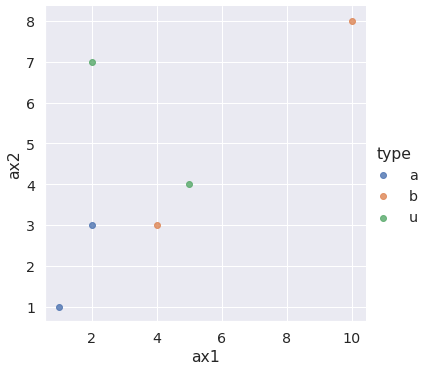

In [ ]:
sns.lmplot('ax1','ax2', data=sample, hue='type', fit_reg=False)
print('\n')
print(knn.predict_proba(x_test))

In [ ]:
# 3-NN
# 맨해튼 거리
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan')
knn.fit(x,y)

# test data
x_test = pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred = knn.predict(x_test)
print('분류: ',pred,'\n')

# test data와 train data와의 거리
print(knn.kneighbors(x_test,4))

분류:  ['a' 'a'] 

(array([[4., 6., 7., 9.],
       [2., 4., 7., 9.]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]]))


In [ ]:
sample = pd.concat([x.join(y), x_test.join(pd.DataFrame(pred,columns=['type']))])
sample

,ax1,ax2,type
0,1,1,a
1,2,3,a
2,4,3,b
3,10,8,b
0,2,7,a
1,5,4,a


In [ ]:
sample.reset_index(inplace=True)
sample.drop('index',axis=1,inplace=True) # 반드시 reset_index를 먼저 수행해야 함

[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]


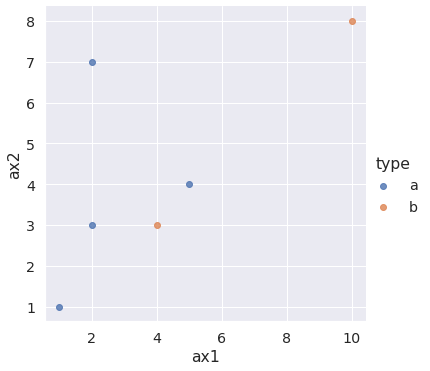

In [ ]:
sns.lmplot('ax1','ax2', data=sample, hue='type',fit_reg=False)
print(knn.predict_proba(x_test))

분류:  ['a' 'a'] 

(array([[4.        , 4.47213595, 6.08276253, 8.06225775],
       [1.41421356, 3.16227766, 5.        , 6.40312424]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]]))

 [[0.5 0.5]
 [0.5 0.5]]


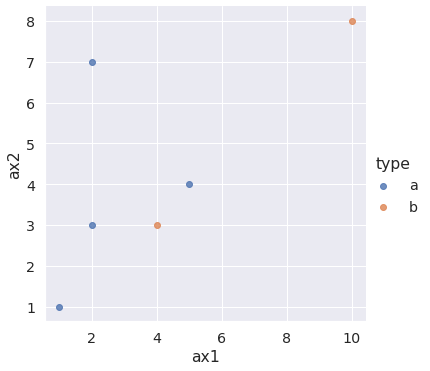

In [ ]:
# 2-NN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x,y)

# test data
x_test = pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred = knn.predict(x_test)
print('분류: ',pred,'\n')

# test data와 train data와의 거리
print(knn.kneighbors(x_test,4))

sample = pd.concat([x.join(y), x_test.join(pd.DataFrame(pred,columns=['type']))])
sample.reset_index(inplace=True)
sample.drop('index',axis=1,inplace=True) # 반드시 reset_index를 먼저 수행해야 함

sns.lmplot('ax1','ax2', data=sample, hue='type',fit_reg=False)
print('\n',knn.predict_proba(x_test))

분류:  ['a' 'b'] 

(array([[4.        , 4.47213595, 6.08276253, 8.06225775],
       [1.41421356, 3.16227766, 5.        , 6.40312424]]), array([[1, 2, 0, 3],
       [2, 1, 0, 3]]))

 [[0.52786405 0.47213595]
 [0.30901699 0.69098301]]

 0.5278640447218036 0.47213595527819635


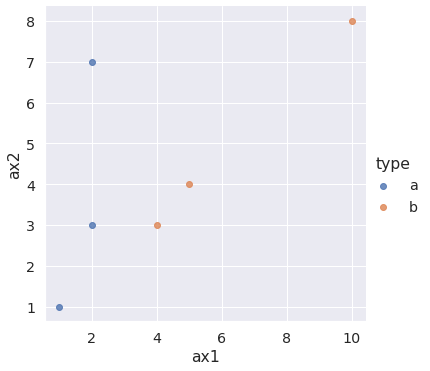

In [ ]:
# 2-NN classifier
# 가중치 부여
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(x,y)

# test data
x_test = pd.DataFrame([[2,7],[5,4]], columns=['ax1','ax2'])
pred = knn.predict(x_test)
print('분류: ',pred,'\n')

# test data와 train data와의 거리
print(knn.kneighbors(x_test,4))

sample = pd.concat([x.join(y), x_test.join(pd.DataFrame(pred,columns=['type']))])
sample.reset_index(inplace=True)
sample.drop('index',axis=1,inplace=True) # 반드시 reset_index를 먼저 수행해야 함

sns.lmplot('ax1','ax2', data=sample, hue='type',fit_reg=False)
print('\n',knn.predict_proba(x_test))

ap = 1/4
bp = 1/4.47213595
n = 1/(ap+bp)

print('\n',ap*n, bp*n)

# 서포트 벡터 머신 (Support Vector Machin)

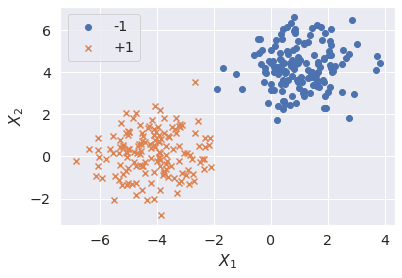

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=3, cluster_std=1)

y = 2*y-1 # +1, -1로 바꿔주는 함수

plt.scatter(X[y==-1,0], X[y==-1,1], marker='o', label='-1')
plt.scatter(X[y==+1,0], X[y==+1,1], marker='x', label='+1')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.show()

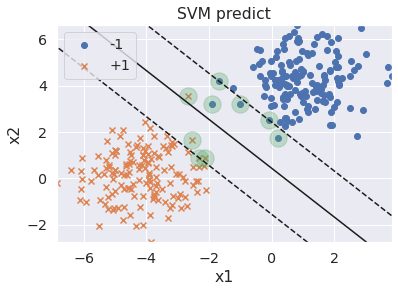

In [ ]:
from sklearn.svm import SVC
import numpy as np

model = SVC(kernel = 'linear', C=0.1).fit(X,y)

xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx,yy)

Z = np.empty(X1.shape)
for (i,j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i,j]
    p = model.decision_function([[x1,x2]])
    Z[i,j] = p[0]
levels = [-1,0,1]
linestyles = ['dashed','solid','dashed']
plt.scatter(X[y==-1,0], X[y==-1,1], marker='o', label='-1')
plt.scatter(X[y==+1,0], X[y==+1,1], marker='x', label='+1')
plt.contour(X1,X2,Z,levels,colors='k',linestyles=linestyles)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, alpha=0.3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('SVM predict')
plt.show()

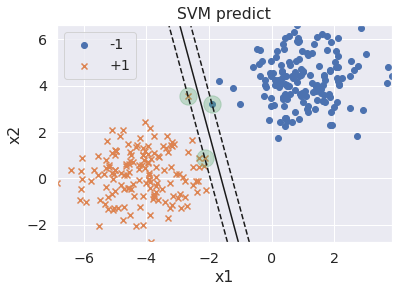

In [ ]:
from sklearn.svm import SVC
import numpy as np

model = SVC(kernel = 'linear', C=10).fit(X,y)

xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx,yy)

Z = np.empty(X1.shape)
for (i,j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i,j]
    p = model.decision_function([[x1,x2]])
    Z[i,j] = p[0]
levels = [-1,0,1]
linestyles = ['dashed','solid','dashed']
plt.scatter(X[y==-1,0], X[y==-1,1], marker='o', label='-1')
plt.scatter(X[y==+1,0], X[y==+1,1], marker='x', label='+1')
plt.contour(X1,X2,Z,levels,colors='k',linestyles=linestyles)
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, alpha=0.3)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('SVM predict')
plt.show()

# 앙상블(Ensemble)

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

dta_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dta_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1. 로지스틱회귀와 KNN을 활용해 앙상블(보팅) 모델 구현
## 2. VotingClassifier의 정확도 평가

In [ ]:
lr_clf = LogisticRegression(max_iter=500)
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

Voting 분류기 정확도: 0.9561


## 개별모델(로지스틱회귀/KNN)의 정확도 측정

In [ ]:
# 개별모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

LogisticRegression 정확도: 0.9561
KNeighborsClassifier 정확도: 0.9386


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음.
# 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/머신러닝/비타민/features.txt', sep = '\s+', header = None, names = ['column_index', 'column_name'])

# 피처명 index를 제거하고 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns = ['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
    return new_feature_name_df

def get_human_dataset():
    feature_name_df = pd.read_csv('/content/drive/MyDrive/머신러닝/비타민/features.txt', sep = '\s+', header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('/content/drive/MyDrive/머신러닝/비타민/X_train.txt', sep='\s+', names = feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/머신러닝/비타민/X_test.txt', sep = '\s+', names = feature_name)
    y_train = pd.read_csv('/content/drive/MyDrive/머신러닝/비타민/y_train.txt', sep='\s+', header=None, names = ['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/머신러닝/비타민/y_test.txt', sep = '\s+', header=None, names = ['action'])
    return X_train, X_test, y_train, y_test


column_index    42
dtype: int64


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = get_human_dataset()

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('Deicison Tree 예측 정확도: {0:.4f}'.format(accuracy))

Deicison Tree 예측 정확도: 0.8595


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 튜닝

In [48]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100],
         'max_depth':[6,8,10,12],
         'min_samples_leaf':[8,12,18],
         'min_samples_split':[8,16,20]}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)  # n_jobs=-1 : 모든 CPU 코어를 이용해 학습
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9180


In [49]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth =10, min_samples_leaf =8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index= X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

In [51]:
ftr_importances

tBodyAcc-mean()-X                       0.000077
tBodyAcc-mean()-Y                       0.000155
tBodyAcc-mean()-Z                       0.000075
tBodyAcc-std()-X                        0.007179
tBodyAcc-std()-Y                        0.000197
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000266
angle(tBodyGyroJerkMean,gravityMean)    0.000471
angle(X,gravityMean)                    0.029071
angle(Y,gravityMean)                    0.029033
angle(Z,gravityMean)                    0.010431
Length: 561, dtype: float64

In [52]:
ftr_top20

tGravityAcc-min()-X                0.032487
tGravityAcc-mean()-Y               0.030986
tGravityAcc-min()-Y                0.029188
angle(X,gravityMean)               0.029071
angle(Y,gravityMean)               0.029033
tGravityAcc-energy()-X             0.028219
tGravityAcc-max()-X                0.027648
tGravityAcc-mean()-X               0.027126
tGravityAcc-max()-Y                0.024552
tGravityAcc-energy()-Y             0.015663
fBodyAccJerk-bandsEnergy()-1,8     0.014605
tGravityAcc-max()-Z                0.012352
tGravityAcc-arCoeff()-Z,2          0.011623
fBodyAccMag-mad()                  0.010764
angle(Z,gravityMean)               0.010431
tGravityAcc-arCoeff()-Y,1          0.010140
fBodyAccJerk-bandsEnergy()-1,16    0.010058
fBodyAccMag-energy()               0.009471
tGravityAcc-mean()-Z               0.009270
tGravityAcc-arCoeff()-Z,1          0.009110
dtype: float64

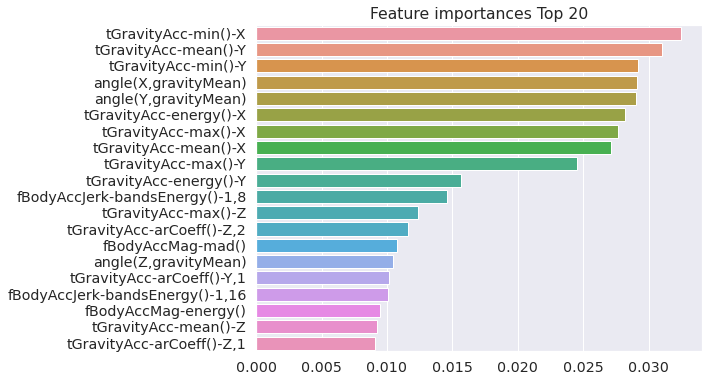

In [53]:
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

# 실습

## 아이리스 데이터 분석 : KNN

In [54]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/머신러닝/비타민/iris.csv')
X = df.drop('species', axis=1)
y = df['species']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('KNN training set 정확도: ', knn.score(X_train, y_train))
print('KNN test set 정확도: ', accuracy_score(y_test, pred))
confusion_matrix(y_test,pred)

KNN training set 정확도:  0.95
KNN test set 정확도:  1.0


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.
findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.


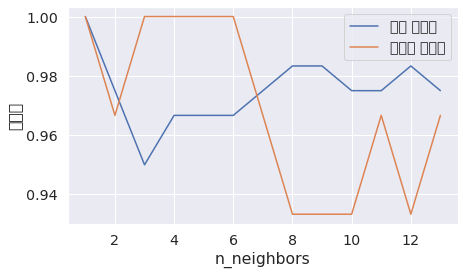

In [56]:
from matplotlib import font_manager, rc
font_path = '/content/drive/MyDrive/머신러닝/비타민/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
font_manager._rebuild()



training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,14)

for n_neighbors in neighbors_settings:
  knn = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(X_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(knn.score(X_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(knn.score(X_test,y_test))

rc('font', family='malgun') 
plt.figure(figsize=(7,4))
plt.plot(neighbors_settings, training_accuracy, label = '훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend(loc='bottom right')  

In [60]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors':[3,5,7,9],
               'weights':['uniform','distance'],
               'metric':['euclidean','manhattan']}
gs = GridSearchCV(knn, grid_params, cv=3)
gs_results = gs.fit(X_train, y_train)

gs_results.best_estimator_

scores_df = pd.DataFrame(gs_results.cv_results_)
print(scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split1_test_score']].sort_values(by=['rank_test_score']).head())

params = scores_df['params'][scores_df['rank_test_score']==1]
print('\n')
for i in range(len(params)):
  print(params.iloc[i])

                                              params  ...  split1_test_score
4  {'metric': 'euclidean', 'n_neighbors': 7, 'wei...  ...              0.975
5  {'metric': 'euclidean', 'n_neighbors': 7, 'wei...  ...              0.950
7  {'metric': 'euclidean', 'n_neighbors': 9, 'wei...  ...              0.975
2  {'metric': 'euclidean', 'n_neighbors': 5, 'wei...  ...              0.950
3  {'metric': 'euclidean', 'n_neighbors': 5, 'wei...  ...              0.950

[5 rows x 6 columns]


{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


## 아이리스 데이터 분석 : SVM

In [65]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',C=1)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)

print('SVM training set 정확도: ', svm.score(X_train, y_train))
print('SVM test set 정확도: ', accuracy_score(y_test,pred))
confusion_matrix(y_test,pred)

SVM training set 정확도:  0.9916666666666667
SVM test set 정확도:  1.0


array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

## 아이리스 데이터 분석 : 랜덤포레스트

In [132]:
df = pd.read_csv('/content/drive/MyDrive/머신러닝/비타민/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [133]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=65)

In [134]:
y.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [135]:
# Decision Tree로 학습/예측/평가
dt_clf = DecisionTreeClassifier(random_state=65)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

print('의사결정나무 training set 정확도: ', dt_clf.score(X_train, y_train))
print('의사결정나무 test set 정확도: ', dt_accuracy)

의사결정나무 training set 정확도:  1.0
의사결정나무 test set 정확도:  0.9736842105263158


In [136]:
# Random Forest로 학습/예측/평가
rf_clf = RandomForestClassifier(n_estimators=100, random_state=65)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)

print('랜덤포레스트 training set 정확도: ', rf_clf.score(X_train, y_train))
print('랜덤포레스트 test set 정확도: ', rf_accuracy)

랜덤포레스트 training set 정확도:  1.0
랜덤포레스트 test set 정확도:  0.9736842105263158
